In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('/content/Metro-Interstate-Traffic-Volume-Encoded.csv')

In [3]:
data.head()

,holiday,temp,rain_1h,snow_1h,Year,Month,Day,Hour,weather_main,weather_description,traffic_volume
0,7,288.28,0.0,0.0,2012,10,2,9,1,24,5545
1,7,289.36,0.0,0.0,2012,10,2,10,1,2,4516
2,7,289.58,0.0,0.0,2012,10,2,11,1,19,4767
3,7,290.13,0.0,0.0,2012,10,2,12,1,19,5026
4,7,291.14,0.0,0.0,2012,10,2,13,1,2,4918


In [4]:
X = data.drop('traffic_volume',axis=1)
Y = data['traffic_volume']

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
LR = LinearRegression()

In [9]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
pred = LR.predict(xtest)

In [16]:

import sklearn.metrics as metrics

In [12]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.14054327143656542


In [13]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  1615.7926439192036


In [14]:
print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  3355289.8232976357


In [15]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1831.7450213655927



Forward Selection
Lets proceed with the forward selection to get which feature is more important for the traffic_volume Prediction
In each iteration, we add one more feature and find the score till an addition of a new variable does not improve the performance of the model.


**Forward** **Selection**

Creating a GRID search to find the best single feature

In [18]:


for i in range(len(data.columns)-1):
    X=  data[[data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],': ',round(metrics.r2_score(ytest,pred),4))

holiday :  0.0006
temp :  0.0192
rain_1h :  -0.0
snow_1h :  -0.0001
Year :  -0.0002
Month :  0.0
Day :  -0.0001
Hour :  0.1278
weather_main :  0.0002
weather_description :  0.0041


In [19]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.1378
temp 0.1393
rain_1h 0.1376
snow_1h 0.1375
Year 0.1376
Month 0.1385
Day 0.1376
Hour 0.1376
weather_main 0.1373
weather_description 0.1398


In [20]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.1398
rain_1h 0.1399
snow_1h 0.1397
Year 0.1395
Month 0.1408
Day 0.1398
Hour 0.1398
weather_main 0.1397
weather_description 0.1398


In [21]:
for i in range(len(data.columns)-1):
    X=  data[['temp','Hour','weather_description','holiday',data.columns[i]]]
    Y=  data[['traffic_volume']]
    xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size = 0.25,random_state = 0)
    LR.fit(xtrain,ytrain)
    pred = LR.predict(xtest)
    print(data.columns[i],round(metrics.r2_score(ytest,pred),4))

holiday 0.14
temp 0.14
rain_1h 0.1401
snow_1h 0.1399
Year 0.1397
Month 0.1409
Day 0.14
Hour 0.14
weather_main 0.1399
weather_description 0.14



Polynomial Transformation:
To understand the need for polynomial regression, we will see the scatter plot of the residuals

In [22]:
import matplotlib.pyplot as plt

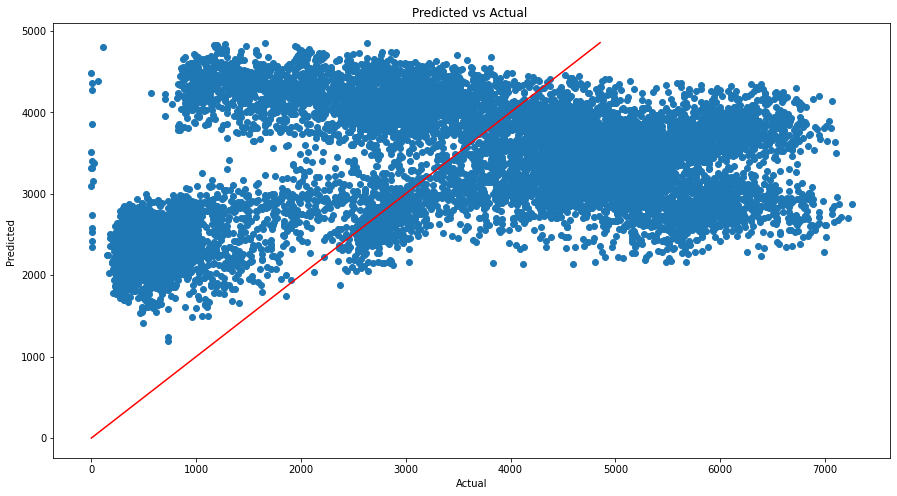

In [23]:

plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Predicted vs Actual ')
plt.xlabel ('Actual') 
plt.ylabel ('Predicted ') 
plt.show ()

In [24]:
from sklearn.preprocessing import PolynomialFeatures

In [25]:

pf = PolynomialFeatures(degree=2)

In [26]:
data1 = data.copy()

In [27]:

X = data1.drop('traffic_volume',axis=1)
Y= data1['traffic_volume']


Transforming the data

In [28]:
X = pf.fit_transform(X)

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.25,random_state=0)

In [30]:
LR = LinearRegression()

In [31]:
LR.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
pred = LR.predict(xtest)

In [33]:
print('R Squared : ',metrics.r2_score(ytest,pred))

R Squared :  0.6566242906815996


In [34]:

print('Mean Absolute Error : ',metrics.mean_absolute_error(ytest,pred))

Mean Absolute Error :  893.3409605636388


In [35]:

print('Mean Squared Error : ',metrics.mean_squared_error(ytest,pred))

Mean Squared Error :  1340527.0850219429


In [36]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(ytest,pred)))

Root Mean Squared Error :  1157.8113339495096


We can see now the R squared has increased and it is 65 percent which indicates that 65 percent of variation is reduced after transforming the data to polynomial regression

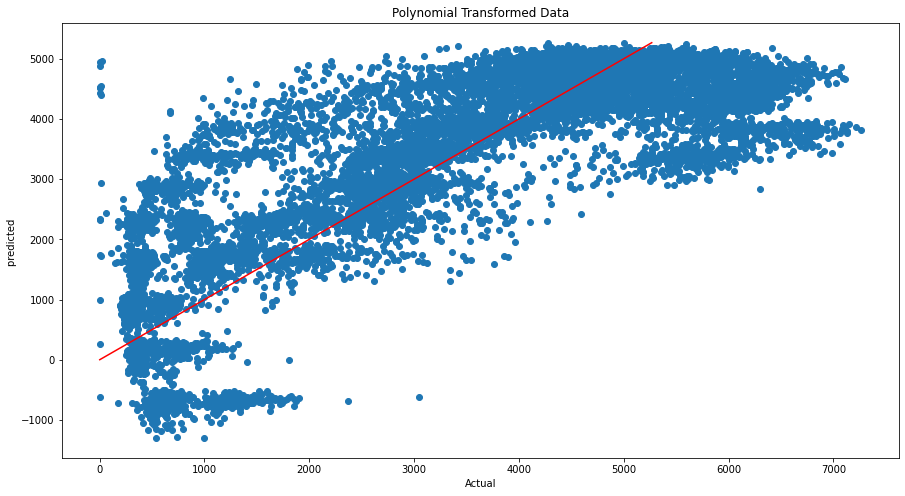

In [37]:
plt.figure(figsize=(15,8))
plt.scatter (ytest, pred) 
range = [ytest.min (), pred.max ()] 
plt.plot (range, range, 'red') 
plt.title('Polynomial Transformed Data')
plt.xlabel ('Actual') 
plt.ylabel ('predicted ') 
plt.show ()


we can see that still the line is not a best fit but it is more better than the original data. Transformed data has given a better performance thanthe original one